In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [42]:
batch_size = 512
epochs = 10
IMG_HEIGHT = 100
IMG_WIDTH = 100

In [43]:
train_dir = '/mnt/Datos/Descargas/LISA traffic light dataset/imgSeparadas/trainDAY/'

train_image_generator = ImageDataGenerator() # Generator for our training data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

validation_dir = '/mnt/Datos/Descargas/LISA traffic light dataset/imgSeparadas/dayseq1/'
validation_image_generator = ImageDataGenerator() # Generator for our validation data
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 27703 images belonging to 2 classes.
Found 7900 images belonging to 2 classes.


In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100,3)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# Configuracion de los logs y de Tensorboard.
log_dir="logs/testnuevo/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [51]:
%load_ext tensorboard
%tensorboard --logdir logs/testnuevo

In [52]:
#model.fit(train_data_gen, val_data_gen, epochs=10, callbacks=[tensorboard_callback])

model.fit_generator(train_data_gen,
                    steps_per_epoch=None,
                    epochs=epochs,
                    verbose=1, 
                    callbacks=[tensorboard_callback], 
                    validation_data=val_data_gen, 
                    validation_steps=None, 
                    validation_freq=1, 
                    class_weight=None, 
                    max_queue_size=10, 
                    shuffle=True)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 55 steps, validate for 16 steps
Epoch 1/10
55/55 [==============================] - 21s 376ms/step - loss: 20.6640 - accuracy: 0.9318 - val_loss: 12.5808 - val_accuracy: 0.8866
Epoch 2/10
55/55 [==============================] - 20s 370ms/step - loss: 0.3106 - accuracy: 0.9965 - val_loss: 6.7454 - val_accuracy: 0.9495
Epoch 3/10
55/55 [==============================] - 20s 370ms/step - loss: 0.2236 - accuracy: 0.9975 - val_loss: 10.5896 - val_accuracy: 0.9363
Epoch 4/10
55/55 [==============================] - 21s 373ms/step - loss: 0.3898 - accuracy: 0.9964 - val_loss: 40.7495 - val_accuracy: 0.8811
Epoch 5/10
55/55 [==============================] - 21s 375ms/step - loss: 0.4108 - accuracy: 0.9961 - val_loss: 35.4827 - val_accuracy: 0.8911
Epoch 6/10
55/55 [==============================] - 20s 372ms/step - loss: 0.1369 - accuracy: 0.9984 - val_loss: 3.7808 - val_accuracy: 0.9701
Epoch 7/10
55/55 [===========================

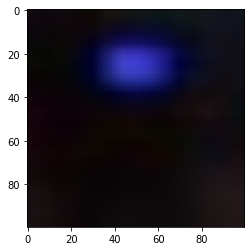

In [53]:
#Testing
import cv2
test_img = cv2.imread('/mnt/Datos/Descargas/LISA traffic light dataset/imgSeparadas/dayseq1/stop/10.jpg')
test_img = cv2.resize(test_img, (100,100))
plt.imshow(test_img)
test_img = np.expand_dims(test_img, axis=0)


In [54]:
predict = model.predict(test_img)
print(predict)

[[1. 0.]]


In [55]:
print(np.max(predict[0]))
print(np.min(predict[0]))

np.argmax(predict[0])

1.0
0.0


0

In [56]:
model.save('nuevoModeloBinario10epochs.h5')